In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# 2000 entries, 14 features, 1 label
df = pd.read_csv('df.csv', header=0)
df

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h,estimated_diameter_min_km,estimated_diameter_max_km,miss_distance_km,is_potentially_hazardous
0,2003 YG136,8,2.453007e+06,2004-Jan-02 02:01,0.018890,0.018803,0.018978,11.349593,11.337158,< 00:01,25.24,0.023799,0.053216,1.756299e+07,False
1,2004 AD1,17,2.453008e+06,2004-Jan-03 11:52,0.039728,0.039727,0.039730,12.361220,12.355793,< 00:01,22.50,0.084053,0.187949,1.445045e+07,False
2,2004 AD,18,2.453008e+06,2004-Jan-03 19:13,0.027346,0.027345,0.027347,7.312034,7.298697,< 00:01,24.40,0.035039,0.078350,2.141024e+07,False
3,2022 EH4,5,2.453016e+06,2004-Jan-11 07:07,0.024726,0.019411,0.115374,7.153503,7.138423,8_05:32,24.93,0.027451,0.061382,6.971645e+07,False
4,2004 BA75,9,2.453018e+06,2004-Jan-13 13:11,0.020793,0.020499,0.021088,17.336109,17.328716,00:49,24.45,0.034242,0.076567,3.110656e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2010 SC,12,2.455464e+06,2010-Sep-24 13:27,0.028528,0.028386,0.028670,5.090663,5.072283,< 00:01,26.00,0.016771,0.037501,5.595830e+07,False
1995,2010 TD,11,2.455466e+06,2010-Sep-26 09:08,0.005009,0.004975,0.005044,18.687830,18.659344,00:04,26.86,0.011286,0.025237,1.605984e+07,False
1996,2010 RD130,10,2.455469e+06,2010-Sep-29 04:26,0.037590,0.037255,0.037925,11.101723,11.095336,00:08,25.40,0.022108,0.049436,5.623389e+06,False
1997,2009 SH2,22,2.455470e+06,2010-Sep-30 05:39,0.018319,0.018148,0.018490,4.558028,4.526004,00:06,24.90,0.027833,0.062236,1.323081e+06,False


In [3]:
df.dtypes

des                           object
orbit_id                       int64
jd                           float64
cd                            object
dist                         float64
dist_min                     float64
dist_max                     float64
v_rel                        float64
v_inf                        float64
t_sigma_f                     object
h                            float64
estimated_diameter_min_km    float64
estimated_diameter_max_km    float64
miss_distance_km             float64
is_potentially_hazardous      object
dtype: object

In [4]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

des                           0
orbit_id                      0
jd                            0
cd                            0
dist                          0
dist_min                      0
dist_max                      0
v_rel                         0
v_inf                         4
t_sigma_f                     0
h                             0
estimated_diameter_min_km    95
estimated_diameter_max_km    95
miss_distance_km             95
is_potentially_hazardous     95
dtype: int64

In [5]:
df = df.dropna() # dropping rows with nan values, could consider filling in and replacing values

In [6]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

des                          0
orbit_id                     0
jd                           0
cd                           0
dist                         0
dist_min                     0
dist_max                     0
v_rel                        0
v_inf                        0
t_sigma_f                    0
h                            0
estimated_diameter_min_km    0
estimated_diameter_max_km    0
miss_distance_km             0
is_potentially_hazardous     0
dtype: int64

In [7]:
tf_counts = df['is_potentially_hazardous'].value_counts() # finding how many neo's are potentially hazardous and how many aren't
tf_counts

is_potentially_hazardous
False    1800
True      100
Name: count, dtype: int64

In [8]:
df = df.drop(columns=['des','orbit_id','cd','t_sigma_f']) # dropping columns that may be irrelevant for prediction
df

,jd,dist,dist_min,dist_max,v_rel,v_inf,h,estimated_diameter_min_km,estimated_diameter_max_km,miss_distance_km,is_potentially_hazardous
0,2.453007e+06,0.018890,0.018803,0.018978,11.349593,11.337158,25.24,0.023799,0.053216,1.756299e+07,False
1,2.453008e+06,0.039728,0.039727,0.039730,12.361220,12.355793,22.50,0.084053,0.187949,1.445045e+07,False
2,2.453008e+06,0.027346,0.027345,0.027347,7.312034,7.298697,24.40,0.035039,0.078350,2.141024e+07,False
3,2.453016e+06,0.024726,0.019411,0.115374,7.153503,7.138423,24.93,0.027451,0.061382,6.971645e+07,False
4,2.453018e+06,0.020793,0.020499,0.021088,17.336109,17.328716,24.45,0.034242,0.076567,3.110656e+06,False
...,...,...,...,...,...,...,...,...,...,...,...
1994,2.455464e+06,0.028528,0.028386,0.028670,5.090663,5.072283,26.00,0.016771,0.037501,5.595830e+07,False
1995,2.455466e+06,0.005009,0.004975,0.005044,18.687830,18.659344,26.86,0.011286,0.025237,1.605984e+07,False
1996,2.455469e+06,0.037590,0.037255,0.037925,11.101723,11.095336,25.40,0.022108,0.049436,5.623389e+06,False
1997,2.455470e+06,0.018319,0.018148,0.018490,4.558028,4.526004,24.90,0.027833,0.062236,1.323081e+06,False


In [11]:
label_encoder = LabelEncoder() # converting label column to numerical format i.e 0 or 1
df['is_potentially_hazardous'] = label_encoder.fit_transform(df['is_potentially_hazardous'])
df

,jd,dist,dist_min,dist_max,v_rel,v_inf,h,estimated_diameter_min_km,estimated_diameter_max_km,miss_distance_km,is_potentially_hazardous
0,2.453007e+06,0.018890,0.018803,0.018978,11.349593,11.337158,25.24,0.023799,0.053216,1.756299e+07,0
1,2.453008e+06,0.039728,0.039727,0.039730,12.361220,12.355793,22.50,0.084053,0.187949,1.445045e+07,0
2,2.453008e+06,0.027346,0.027345,0.027347,7.312034,7.298697,24.40,0.035039,0.078350,2.141024e+07,0
3,2.453016e+06,0.024726,0.019411,0.115374,7.153503,7.138423,24.93,0.027451,0.061382,6.971645e+07,0
4,2.453018e+06,0.020793,0.020499,0.021088,17.336109,17.328716,24.45,0.034242,0.076567,3.110656e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,2.455464e+06,0.028528,0.028386,0.028670,5.090663,5.072283,26.00,0.016771,0.037501,5.595830e+07,0
1995,2.455466e+06,0.005009,0.004975,0.005044,18.687830,18.659344,26.86,0.011286,0.025237,1.605984e+07,0
1996,2.455469e+06,0.037590,0.037255,0.037925,11.101723,11.095336,25.40,0.022108,0.049436,5.623389e+06,0
1997,2.455470e+06,0.018319,0.018148,0.018490,4.558028,4.526004,24.90,0.027833,0.062236,1.323081e+06,0


In [12]:
X = df.drop(columns=['is_potentially_hazardous']) # features
y = df['is_potentially_hazardous'] # target variable

In [13]:
scaler = StandardScaler() # scaling numerical features
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.92240425, -0.42074684, -0.26657715, ..., -0.24820314,
        -0.24820314, -0.32521674],
       [-1.92037209,  1.03947796,  1.212012  , ...,  1.20461081,
         1.20461081, -0.39677831],
       [-1.91993146,  0.17176031,  0.33702589, ...,  0.0228189 ,
         0.0228189 , -0.23676304],
       ...,
       [ 1.62387671,  0.88963738,  1.03733974, ..., -0.2889636 ,
        -0.2889636 , -0.59972468],
       [ 1.62538916, -0.46080495, -0.31287416, ..., -0.15094111,
        -0.15094111, -0.6985947 ],
       [ 1.62570318, -1.07342194, -0.92255681, ..., -0.61935914,
        -0.61935914, -0.69607682]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # splitting

In [16]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00        25

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380

[[355   0]
 [  0  25]]


In [ ]:
# it's important to note that this model has only been evaluated on a small dataset of 2000 entries

In [19]:
# performing cross-validation for more reliable estimate of model performance across different subsets of data
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', cross_val_scores)
print('Mean Cross-Validation Accuracy:', cross_val_scores.mean())

Cross-Validation Accuracy Scores: [0.99736842 0.99473684 0.99473684 0.98684211 0.99736842]
Mean Cross-Validation Accuracy: 0.9942105263157893


In [21]:
# obtaining abs value of coefficient of the features (the weights assigned to each feature in the linear model)
feature_importance = np.abs(model.coef_[0])
feature_importance

array([0.02875565, 0.32318914, 0.11335678, 0.54957022, 0.08867615,
       0.0917182 , 1.1575479 , 2.23498646, 2.23498646, 0.27700852])

In [23]:
indices = np.argsort(feature_importance)[::-1] # feature importances in descending order
indices

array([8, 7, 6, 3, 1, 9, 2, 5, 4, 0], dtype=int64)

In [24]:
names = [X.columns[i] for i in indices]
names

['estimated_diameter_max_km',
 'estimated_diameter_min_km',
 'h',
 'dist_max',
 'dist',
 'miss_distance_km',
 'dist_min',
 'v_inf',
 'v_rel',
 'jd']

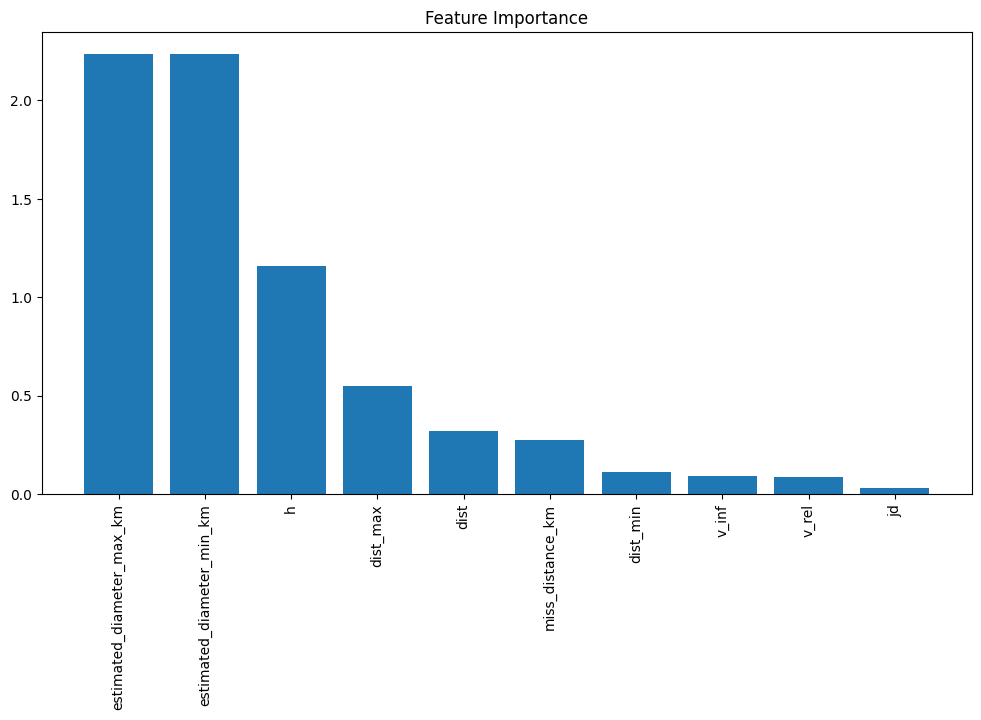

In [26]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
# based on our feature importance analysis, the most important features used
# in our model are estimated_diameter_max_km, estimated_diameter_min_km, and h (absolute magnitude)
# it's also important to note that the two most important features were extracted from the NASA
# API along with the label is_potentially_hazardous and miss_distance_km

In [ ]:
# it's interesting to see velocity is not taken that much into consideration when predicting
# hazardous